In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-question-pairs/train.csv.zip
/kaggle/input/quora-question-pairs/sample_submission.csv.zip
/kaggle/input/quora-question-pairs/test.csv
/kaggle/input/quora-question-pairs/test.csv.zip


import zipfile

zip_path = "/kaggle/input/quora-question-pairs/train.csv.zip"
extract_path = "/kaggle/working/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
df = pd.read_csv('/kaggle/input/quora-question-pairs/train.csv.zip')
df.shape

(404290, 6)

In [3]:
df = df.sample(30000)

In [4]:
df.info

<bound method DataFrame.info of             id    qid1    qid2  \
198070  198070   92043   73272   
235568  235568  346310  346311   
84397    84397  142704  142705   
81720    81720  138696  138697   
43220    43220   77769   10997   
...        ...     ...     ...   
285179  285179  405553  405554   
366264  366264    9350   86555   
371046  371046  501653  501654   
100027  100027  165978  165979   
230565  230565  340128   18032   

                                                question1  \
198070  Who is a better Person for office Hillary of D...   
235568  Psychological Tricks: What are some psychologi...   
84397   What would a modern-day evil genius have to do...   
81720                                  Is evolution true?   
43220              What is the best feeling in the world?   
...                                                   ...   
285179            Why do soccer players get paid so much?   
366264  How do I improve my English with creative writ...   
371046  Ho

In [5]:
#missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()

0

In [7]:
df['is_duplicate'].value_counts()

is_duplicate
0    18805
1    11195
Name: count, dtype: int64

In [8]:
df['is_duplicate'].count()

30000

Text(0, 0.5, 'Frequency')

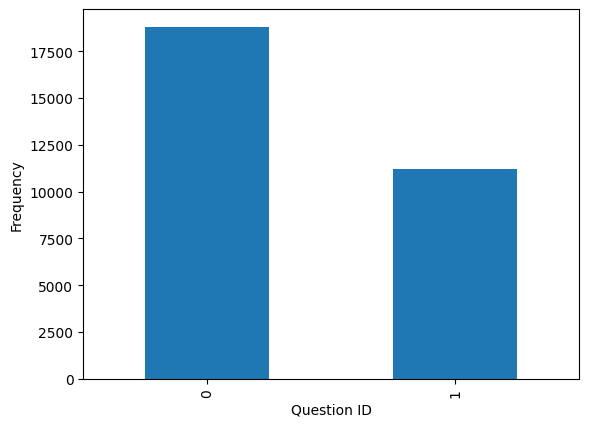

In [9]:
import matplotlib.pyplot as plt
df['is_duplicate'].value_counts().plot(kind='bar')
plt.xlabel("Question ID")
plt.ylabel("Frequency")

In [10]:
# Unique questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print(f'Number of unique questions {np.unique(qid).shape[0]}')

# Repeted questions
x = qid.value_counts()>1
print(f'Number of questions repeated {x[x].shape[0]}')


Number of unique questions 55431
Number of questions repeated 3397


In [11]:
qid.value_counts().values

array([15,  9,  8, ...,  1,  1,  1])

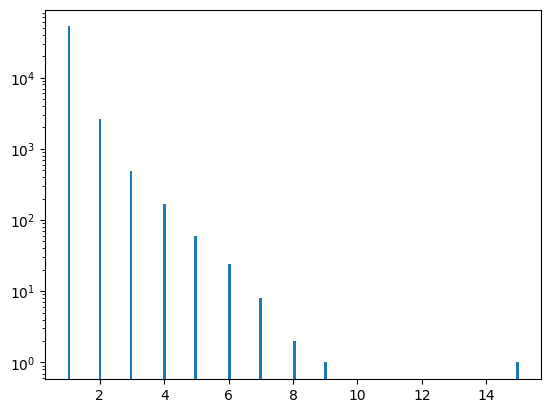

In [12]:
plt.hist(qid.value_counts().values, bins=160)
plt.yscale('log')
plt.show()

qid1 , qid2, question1, question2, is_duplicate <br>
              bow        bow        randomforest

In [13]:
# Feature engineering

In [14]:
ques_df = df[['question1','question2']]
ques_df.head()


,question1,question2
198070,Who is a better Person for office Hillary of D...,Who is better Donald Trump or Hillary Clinton?
235568,Psychological Tricks: What are some psychologi...,What are some underrated life hacks to make my...
84397,What would a modern-day evil genius have to do...,How will the antichrist take over the world?
81720,Is evolution true?,What are some scientific proofs that evolution...
43220,What is the best feeling in the world?,What are some of the best feelings in life?


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Merge all questions into one list
questions = list(ques_df['question1'].fillna("")) + list(ques_df['question2'].fillna(""))

# Vectorize
cv = CountVectorizer(max_features=3000)
q_vectors = cv.fit_transform(questions).toarray()

# Split back into q1 and q2 arrays
half = len(q_vectors) // 2
q1_arr, q2_arr = np.vsplit(q_vectors, [half])

In [16]:
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)

temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
198070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
235568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp_df['is_duplicate'] = df['is_duplicate']
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
198070,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
235568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
43220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
371046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# EDA


### Data Preprocessing & Transformation


In [19]:
temp_df.iloc[:,0:-1].values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [20]:
#importing and splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2, random_state=2)



### Model Selection & Evaluation

### Classification Models / Regression Models

In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.74

In [23]:
#Random Forest Classifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [24]:
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7263333333333334

In [25]:
test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')
print(test_df.shape)

test_df = test_df.sample(2345796)
print(test_df.shape)

/tmp/ipykernel_13/2024445107.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv('/kaggle/input/quora-question-pairs/test.csv.zip')


(3563475, 3)
(2345796, 3)


In [26]:
from scipy.sparse import vstack, hstack

# Vectorize test questions (keep sparse!)
test_questions = list(test_df['question1'].fillna('')) + list(test_df['question2'].fillna(''))
test_vectors = cv.transform(test_questions)  # DO NOT call .toarray()

# Split into two sparse matrices
q1_test, q2_test = test_vectors[:len(test_df)], test_vectors[len(test_df):]

# Horizontally stack the sparse matrices
X_test = hstack([q1_test, q2_test])

In [27]:
# Predict on the Kaggle test set
y_pred = model.predict(X_test)
print("Predictions shape:", y_pred.shape)


Predictions shape: (2345796,)


In [28]:
submission = pd.DataFrame({
    'test_id': test_df['test_id'],    
    'is_duplicate': y_pred
})

submission.to_csv('submission.csv', index=False)

### Model Evaluation Metrics

### Pipelines